<a href="https://colab.research.google.com/github/drogbok/fastcampus/blob/master/AI%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_%EC%95%94%ED%98%B8%ED%99%94%ED%8F%90_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1_5%EC%A3%BC%EC%B0%A8_%EC%9D%B4%EC%A7%84%EA%B5%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install google-auth-oauthlib==0.4.6 protobuf==3.20.3 keras-core==0.1.7 keras-nlp==0.7.0 keras-tuner==1.4.6 kt-legacy==1.0.5 namex==0.0.7 tensorflow==2.12.0 tf_keras==2.14.1 autokeras==1.1.0

  Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (586.0 MB)
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.12.1
    Uninstalling tensorflow-2.12.1:
      Successfully uninstalled tensorflow-2.12.1


In [5]:
import autokeras as ak

import pandas as pd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
from tqdm import tqdm

Using TensorFlow backend


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
csvs = os.listdir("/content/drive/MyDrive/Coin_Data/days/")

In [7]:
dfs = []
for csv in tqdm(csvs):
  df = pd.read_csv(f"/content/drive/MyDrive/Coin_Data/days/{csv}")
  dfs.append(df)

100%|██████████| 104/104 [00:08<00:00, 12.55it/s]


In [16]:
# 하나의 DataFrame으로 만들어주기
df = pd.concat(dfs).reset_index(drop=True)

In [9]:
df

,market,datetime,open,high,low,close,trade_price,trade_volume,change_rate
0,KRW-BTC,2017-09-25T09:00:00,4201000.0,4333000.0,4175000.0,4322000.0,5.602146e+08,132.484755,0.028803
1,KRW-BTC,2017-09-26T09:00:00,4317000.0,4418000.0,4311000.0,4321000.0,9.950724e+07,22.788340,-0.000231
2,KRW-BTC,2017-09-27T09:00:00,4322000.0,4677000.0,4318000.0,4657000.0,1.448276e+08,32.269662,0.077760
3,KRW-BTC,2017-09-28T09:00:00,4657000.0,4772000.0,4519000.0,4586000.0,3.721860e+08,80.588243,-0.015246
4,KRW-BTC,2017-09-29T09:00:00,4586000.0,4709000.0,4476000.0,4657000.0,2.724558e+08,59.352373,0.015482
...,...,...,...,...,...,...,...,...,...
210032,KRW-APT,2025-01-01T09:00:00,12990.0,13480.0,12620.0,13460.0,9.606457e+09,738597.659682,0.034589
210033,KRW-APT,2025-01-02T09:00:00,13460.0,13980.0,13430.0,13800.0,1.102090e+10,802118.084549,0.025260
210034,KRW-APT,2025-01-03T09:00:00,13810.0,14570.0,13560.0,14450.0,1.059873e+10,751973.442166,0.047101
210035,KRW-APT,2025-01-04T09:00:00,14420.0,14850.0,14200.0,14700.0,1.195441e+10,824318.892217,0.017301


In [11]:
# 데이터의 단위를 작게 만들어주기
#값이 너무 크면 모델 학습에 악영향을 끼칠 수 있으니 log를 씌워줍니다
log_columns = ["open", "high", "low", "close", "trade_price", "trade_volume"]
df[log_columns] = np.log1p(df[log_columns])

In [12]:
# KRW-ETH를 테스트 데이터로, 그 외 모든 암호화폐는 학습용 데이터로 구분
eth_df = df[df["market"]=="KRW-ETH"]
train_df = df.drop(index=eth_df.index).reset_index(drop=True)
train_df

,market,datetime,open,high,low,close,trade_price,trade_volume,change_rate
0,KRW-BTC,2017-09-25T09:00:00,15.250833,15.281771,15.244625,15.279229,20.143831,4.893987,0.028803
1,KRW-BTC,2017-09-26T09:00:00,15.278072,15.301198,15.276681,15.278998,18.415741,3.169196,-0.000231
2,KRW-BTC,2017-09-27T09:00:00,15.279229,15.358168,15.278303,15.353882,18.791055,3.504646,0.077760
3,KRW-BTC,2017-09-28T09:00:00,15.353882,15.378276,15.323802,15.338519,19.734904,4.401685,-0.015246
4,KRW-BTC,2017-09-29T09:00:00,15.338519,15.364986,15.314241,15.353882,19.422987,4.100200,0.015482
...,...,...,...,...,...,...,...,...,...
207375,KRW-APT,2025-01-01T09:00:00,9.472012,9.509037,9.443117,9.507552,22.985701,13.512510,0.034589
207376,KRW-APT,2025-01-02T09:00:00,9.507552,9.545455,9.505321,9.532496,23.123059,13.595012,0.025260
207377,KRW-APT,2025-01-03T09:00:00,9.533221,9.586789,9.514953,9.578519,23.084000,13.530458,0.047101
207378,KRW-APT,2025-01-04T09:00:00,9.576441,9.605822,9.561068,9.595671,23.204366,13.622314,0.017301


In [13]:
# train_df로 X_train, y_train 및 eth_df로 X_test, y_test 만들기
X_train = train_df[["open", "high", "low", "trade_price", "trade_volume"]]
X_test = eth_df[["open", "high", "low", "trade_price", "trade_volume"]]
y_train = train_df[["close"]]
y_test = eth_df[["close"]]

In [14]:
# AutoKeras 기반의 예측 모델 선언
reg = ak.StructuredDataRegressor(
    overwrite=True, max_trials=3
)

In [15]:
# 모델 학습시키기
reg.fit(
    X_train,
    y_train,
    validation_split=0.05,
    epochs=10,
)

Trial 3 Complete [00h 03m 04s]
val_loss: 0.0023238947615027428

Best val_loss So Far: 0.0013686504680663347
Total elapsed time: 00h 10m 19s
Epoch 1/10
6481/6481 [==============================] - 19s 3ms/step - loss: 2.4934 - mean_squared_error: 2.4934
Epoch 2/10
6481/6481 [==============================] - 25s 4ms/step - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 3/10
6481/6481 [==============================] - 17s 3ms/step - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 4/10
6481/6481 [==============================] - 18s 3ms/step - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 5/10
6481/6481 [==============================] - 17s 3ms/step - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 6/10
6481/6481 [==============================] - 17s 3ms/step - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 7/10
6481/6481 [==============================] - 17s 3ms/step - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 8/10
6481/6481 [==============================] - 17s 3ms/step 

In [17]:
# 학습 시 사용하지 않은 데이터로 가격 예측
y_pred = reg.predict(X_test)

84/84 [==============================] - 0s 1ms/step


In [18]:
# 예측값, 실제값을 하나의 DataFrame으로 구성하기
#log 씌웠던 값을 np.exp로 다시 원상복구 해줍니다
result_df = np.exp(pd.DataFrame([y_pred.flatten(), y_test.values.flatten()]).T)
result_df.columns = ["y_pred", "y_test"]
result_df["y_pred"] = round(result_df["y_pred"], 0)

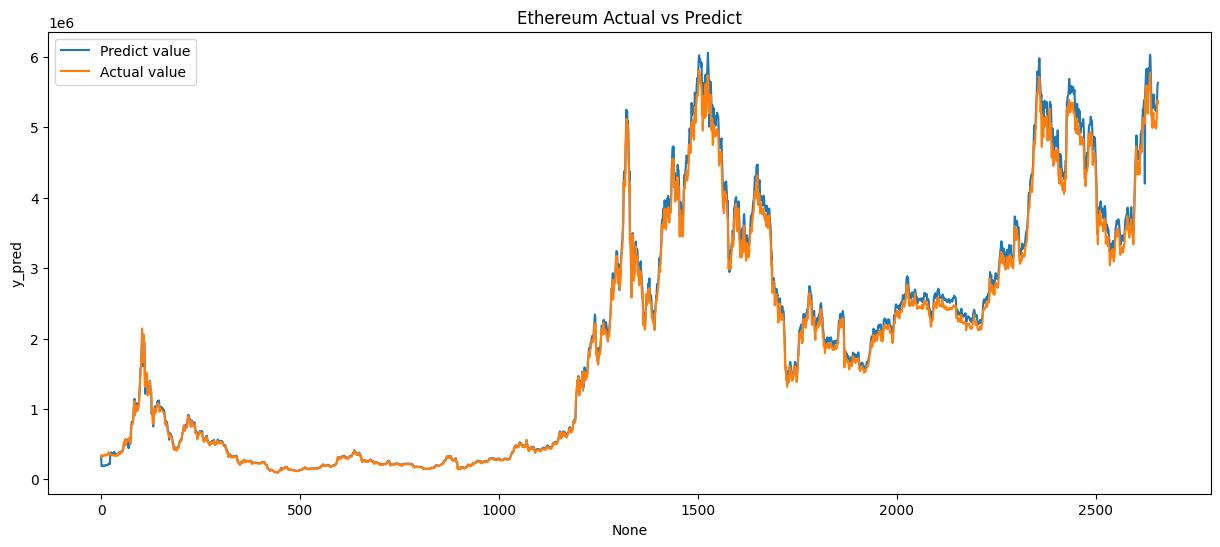

In [19]:
# 예측값과 실제값 시각화로 비교해보기
plt.figure(figsize=(15,6))
sns.lineplot(
    x=result_df.index,
    y=result_df["y_pred"],
    label="Predict value"
)
sns.lineplot(
    x=result_df.index,
    y=result_df["y_test"],
    label="Actual value"
)
plt.title("Ethereum Actual vs Predict")
plt.show()